# Titanic: Machine Learning from Disaster

In [93]:
#Importing Libraries and Loading DataSet

import pandas as pd #For Data Manipulation
import matplotlib.pyplot as plt #Data Visualization Library for EDA
import seaborn as sns #Data Visualization Library For EDA

train = pd.read_csv('train (1).csv') #Loading the Data Set

In [94]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [95]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## Survived 
So we can see that 62% of the people in the training set died.
This is slightly less than the estimated 67% that died in the actual shipwreck (1500/2224).

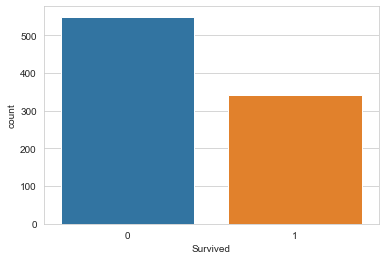

In [96]:
train['Survived'].value_counts(normalize = True)
sns.countplot(train['Survived'])

## Pclass
Class played a critical role in survival, as the survival rate decreased drastically for the lowest class. This variable is both useful and clean, and I will be treating it as a categorical variable.

In [97]:
train['Survived'].groupby(train['Pclass']).count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

Let’s see how many people survived divided by class.

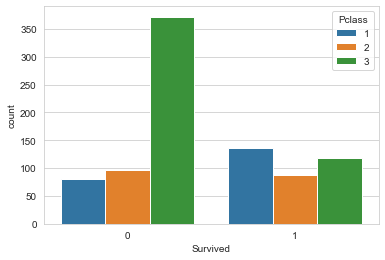

In [98]:
sns.countplot(x = 'Survived',hue='Pclass',data=train)

## Sex
"Women and children first," goes the famous saying. Thus, we should expect females to have a higher survival rate than males, and indeed that is the case. We expect this variable to be very useful in our model.

In [99]:
M = train[train['Sex'].str.match('male')]
len(M)

577

In [100]:
F = train[train['Sex'].str.match('female')]
len(F)

314

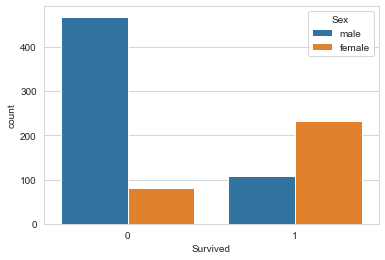

In [101]:
sns.countplot(x = 'Survived', hue = 'Sex', data=train)

We can infer that,If you were a female and you were in class 1, probably you would survive.
On the other hand, if you were a man and you were in class 3, you didn’t have good chances to live.

In [102]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

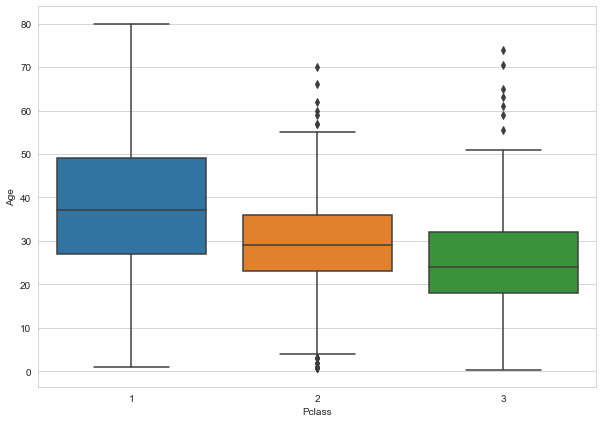

In [103]:
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
sns.boxplot(x = 'Pclass',y = 'Age' ,data = train)

**Let’s impute average age values to null age values:**

In [104]:
#Function to Impute Average
def add_age(cols):
    Age =  cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

In [105]:
train["Age"] = train[["Age", "Pclass"]].apply(add_age,axis=1) #Calling the Function

***We have lots of null values for Cabin column, so we just remove it***

In [106]:
train.drop("Cabin",inplace= True, axis=1 )

In [107]:
train.dropna(inplace=True)

Ok, we are done with cleaning the data. 


***We are going to convert some categorical data into numeric. For example, the sex column.***

**Let’s use the get_dummies function of Pandas. It will create two columns, one for male, one for female.**

In [108]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [109]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [110]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


***Let’s do the same for Embarked and PClass:***

In [111]:
embarked = pd.get_dummies(train["Embarked"],drop_first=True)
pclass = pd.get_dummies(train["Pclass"],drop_first=True)

***Lets add these variables to the Dataset***

In [112]:
train = pd.concat([train,pclass,sex,embarked],axis=1)

***Then, we remove some columns that we are not going to use for our model.***

In [113]:
train.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

***Now our dataset is ready for the model***

**X will contain all the features and y will contain the target variable**

In [114]:
x = train.drop('Survived',axis=1)
y = train['Survived']

***We will use train_test_split from cross_validation module to split our data. 70% of the data will be training data and %30 will be testing data.***

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

***Lets use Logistic Regression to Train the Model***

In [132]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\Rohit Jagadish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

***Lets see how Accurate is our model for Prediction***

In [133]:
predictions = logmodel.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



We got 83% accuraccy, not bad. Let’s see the confusion matrix

***Lets See Confusion Matrix***

In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 33,  71]], dtype=int64)

**True positive: 150 (We predicted a positive result and it was positive)**

**True negative: 71 (We predicted a negative result and it was negative)**

**False positive: 13 (We predicted a positive result and it was negative)**

**False negative: 33 (We predicted a negative result and it was positive)**